In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import cv2
import os
plt.style.use('ggplot')
from IPython.display import Video
from IPython.display import HTML
import face_recognition
from PIL import Image, ImageDraw
from tqdm import tqdm

In [2]:
train_sample_metadata = pd.read_json('./input/dfdc_train_part_0/metadata.json').T
train_sample_metadata.head()

,label,split,original
owxbbpjpch.mp4,FAKE,train,wynotylpnm.mp4
vpmyeepbep.mp4,REAL,train,NaN
fzvpbrzssi.mp4,REAL,train,NaN
htorvhbcae.mp4,FAKE,train,wclvkepakb.mp4
fckxaqjbxk.mp4,FAKE,train,vpmyeepbep.mp4


In [14]:
face_locations = face_recognition.face_locations(image)
if face_locations:
    for face_location in face_locations:

        # Print the location of each face in this image
        top, right, bottom, left = face_location
        print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

        # You can access the actual face itself like this:
        face_image = image[top:bottom, left:right]
        fig, ax = plt.subplots(1,1, figsize=(5, 5))
        plt.grid(False)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.imshow(face_image)

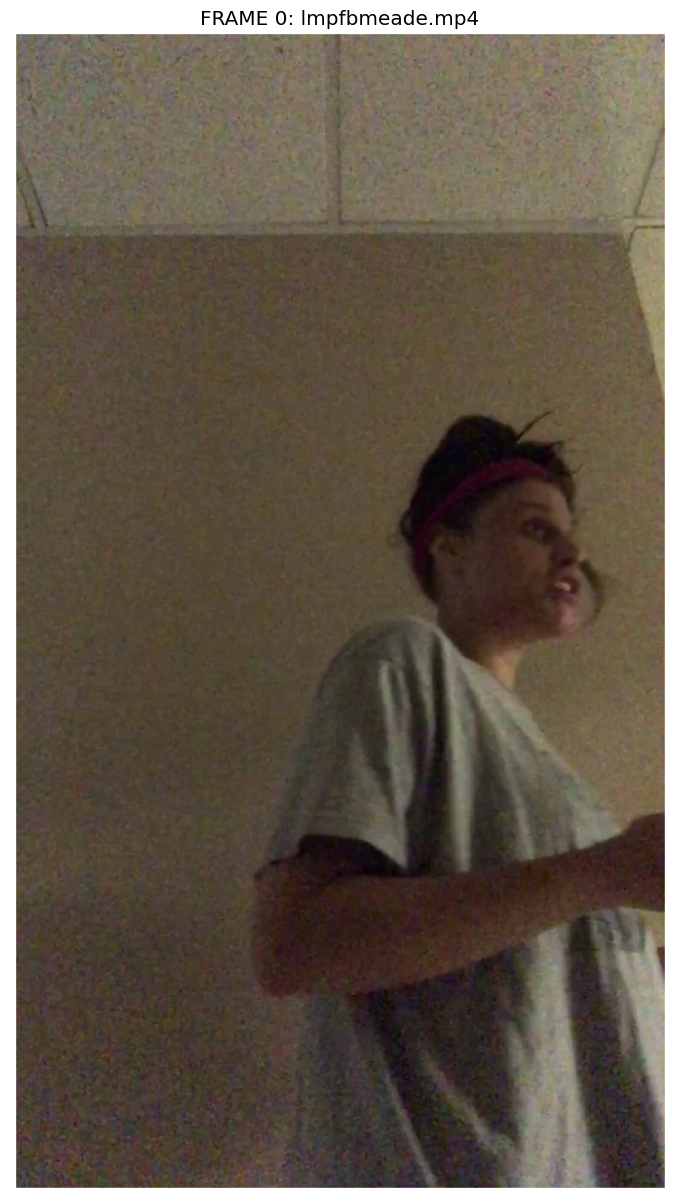

In [3]:
train_dir = './input/dfdc_train_part_0/'
fig, ax = plt.subplots(1,1, figsize=(15, 15))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
video_file = train_video_files[0]
# video_file = './input/train_sample_videos/akxoopqjqz.mp4'
cap = cv2.VideoCapture(video_file)
success, image = cap.read()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cap.release()
ax.imshow(image)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)

In [4]:
face_landmarks_list = face_recognition.face_landmarks(image)
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

if face_landmarks_list:
    for face_landmarks in face_landmarks_list:

        # Print the location of each facial feature in this image
        for facial_feature in face_landmarks.keys():
            print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

        # Let's trace out each facial feature in the image with a line!
        for facial_feature in face_landmarks.keys():
            d.line(face_landmarks[facial_feature], width=3)

    # Show the picture
    display(pil_image)

In [5]:
padding = 40
output_dir = './output/deepfake-detection-challenge/dfdc_train_part_0/'

for fn in tqdm(train_sample_metadata.index[:192]):
    print(fn)
    output_fn_dir = output_dir+fn+'/'
    if not os.path.exists(output_fn_dir):
        os.mkdir(output_fn_dir)
    video_file = train_dir+fn
    cap = cv2.VideoCapture(video_file)
    for i in range(300):
        ret, frame = cap.read()
        if not ret:
            break
        elif (i%10==0):
            face_locations = face_recognition.face_locations(frame)
            if not face_locations:
                continue
            top, right, bottom, left = face_locations[0]
            frame = frame[top-padding:bottom+padding, left-padding:right+padding]
            if frame.any():
                cv2.imwrite(output_fn_dir+str(i)+'.jpg', frame)
    cap.release()

  0%|          | 0/192 [00:00<?, ?it/s]

owxbbpjpch.mp4


  1%|          | 1/192 [00:42<2:15:24, 42.54s/it]

vpmyeepbep.mp4


  1%|          | 2/192 [01:22<2:09:37, 40.93s/it]

fzvpbrzssi.mp4


  2%|▏         | 3/192 [02:02<2:07:53, 40.60s/it]

htorvhbcae.mp4


  2%|▏         | 4/192 [02:42<2:06:27, 40.36s/it]

fckxaqjbxk.mp4


  3%|▎         | 5/192 [03:21<2:04:37, 39.99s/it]

sphirandia.mp4


  3%|▎         | 6/192 [03:59<2:01:30, 39.20s/it]

vsmadeuczx.mp4


  4%|▎         | 7/192 [04:38<2:00:43, 39.15s/it]

ohaqlzfnuv.mp4


  4%|▍         | 8/192 [05:18<2:00:40, 39.35s/it]

komngcqveq.mp4


  5%|▍         | 9/192 [05:57<2:00:00, 39.35s/it]

iafvzgpbix.mp4


  5%|▌         | 10/192 [06:36<1:59:12, 39.30s/it]

uaukglhmje.mp4


  6%|▌         | 11/192 [07:16<1:58:23, 39.24s/it]

syxobtuucp.mp4


  6%|▋         | 12/192 [07:55<1:57:56, 39.31s/it]

dtjcyzgdts.mp4


  7%|▋         | 13/192 [08:35<1:57:41, 39.45s/it]

viuioldtnu.mp4


  7%|▋         | 14/192 [09:14<1:56:50, 39.39s/it]

wnaweyzlqh.mp4


  8%|▊         | 15/192 [09:54<1:56:38, 39.54s/it]

ejhhdlzpjg.mp4


  8%|▊         | 16/192 [10:34<1:56:08, 39.59s/it]

sxyrkshzsg.mp4


  9%|▉         | 17/192 [11:13<1:55:41, 39.67s/it]

uvfkppqsjy.mp4


  9%|▉         | 18/192 [11:53<1:54:50, 39.60s/it]

kedahvzait.mp4


 10%|▉         | 19/192 [12:33<1:54:18, 39.65s/it]

idczhqbbqz.mp4


 10%|█         | 20/192 [13:12<1:53:19, 39.53s/it]

clzkcmoyhb.mp4


 11%|█         | 21/192 [13:51<1:52:41, 39.54s/it]

vpjfmetsvn.mp4


 11%|█▏        | 22/192 [14:31<1:52:13, 39.61s/it]

muksyyltmg.mp4


 12%|█▏        | 23/192 [15:11<1:51:34, 39.61s/it]

ztwlbdwyni.mp4


 12%|█▎        | 24/192 [15:50<1:50:38, 39.52s/it]

jaurxwocly.mp4


 13%|█▎        | 25/192 [16:30<1:50:22, 39.66s/it]

jkxjvuioek.mp4


 14%|█▎        | 26/192 [17:10<1:49:51, 39.71s/it]

dhjnjkzuhq.mp4


 14%|█▍        | 27/192 [17:50<1:49:14, 39.72s/it]

xcruhaccxc.mp4


 15%|█▍        | 28/192 [18:29<1:48:32, 39.71s/it]

rfpjsloxzg.mp4


 15%|█▌        | 29/192 [19:09<1:48:10, 39.82s/it]

kmcdjxmnoa.mp4


 16%|█▌        | 30/192 [19:49<1:47:27, 39.80s/it]

vvwuqslvnq.mp4


 16%|█▌        | 31/192 [20:29<1:47:07, 39.92s/it]

rpxnyljmsf.mp4


 17%|█▋        | 32/192 [21:09<1:46:17, 39.86s/it]

txxungvxms.mp4


 17%|█▋        | 33/192 [21:49<1:45:16, 39.73s/it]

vtunvalyji.mp4


 18%|█▊        | 34/192 [22:28<1:44:32, 39.70s/it]

ihnhxathkq.mp4


 18%|█▊        | 35/192 [23:08<1:43:52, 39.70s/it]

lobxktzhbg.mp4


 19%|█▉        | 36/192 [23:48<1:43:24, 39.77s/it]

slhinthqcq.mp4


 19%|█▉        | 37/192 [24:28<1:42:53, 39.83s/it]

hqzwudvhih.mp4


 20%|█▉        | 38/192 [25:07<1:41:44, 39.64s/it]

xpzfhhwkwb.mp4


 20%|██        | 39/192 [25:46<1:40:55, 39.58s/it]

sglzgdcjkb.mp4


 21%|██        | 40/192 [26:26<1:40:13, 39.57s/it]

xxvwbfmgzy.mp4


 21%|██▏       | 41/192 [27:05<1:39:20, 39.47s/it]

dtmlspmqqp.mp4


 22%|██▏       | 42/192 [27:45<1:38:53, 39.56s/it]

hsxrmrcaqh.mp4


 22%|██▏       | 43/192 [28:25<1:38:14, 39.56s/it]

ykbhmueovi.mp4


 23%|██▎       | 44/192 [29:08<1:40:46, 40.86s/it]

inzrlbgtul.mp4


 23%|██▎       | 45/192 [29:48<1:39:02, 40.43s/it]

xtcbnasaew.mp4


 24%|██▍       | 46/192 [30:28<1:38:06, 40.32s/it]

kgfcupxgur.mp4


 24%|██▍       | 47/192 [31:08<1:36:57, 40.12s/it]

nkojmntmdg.mp4


 25%|██▌       | 48/192 [31:47<1:36:03, 40.03s/it]

btizoxwqwp.mp4


 26%|██▌       | 49/192 [32:28<1:35:30, 40.08s/it]

zvsivkdkak.mp4


 26%|██▌       | 50/192 [33:07<1:34:41, 40.01s/it]

yjllqhbmke.mp4


 27%|██▋       | 51/192 [33:47<1:33:32, 39.81s/it]

qyqufaskjs.mp4


 27%|██▋       | 52/192 [34:26<1:32:33, 39.67s/it]

ygknkubeyb.mp4


 28%|██▊       | 53/192 [35:06<1:32:02, 39.73s/it]

wkczijuamz.mp4


 28%|██▊       | 54/192 [35:45<1:31:11, 39.65s/it]

dolynaukae.mp4


 29%|██▊       | 55/192 [36:25<1:30:16, 39.54s/it]

eisofhptvk.mp4


 29%|██▉       | 56/192 [37:05<1:30:03, 39.73s/it]

xymeodlrhb.mp4


 30%|██▉       | 57/192 [37:45<1:29:37, 39.83s/it]

vqwkmjorkj.mp4


 30%|███       | 58/192 [38:25<1:29:20, 40.00s/it]

rnpefxwptv.mp4


 31%|███       | 59/192 [39:03<1:26:48, 39.16s/it]

gilzdnbpep.mp4


 31%|███▏      | 60/192 [39:40<1:25:13, 38.74s/it]

bpguesjrfa.mp4


 32%|███▏      | 61/192 [40:18<1:23:48, 38.38s/it]

vamicuaopj.mp4


 32%|███▏      | 62/192 [40:56<1:22:45, 38.20s/it]

jqypqwufdv.mp4


 33%|███▎      | 63/192 [41:33<1:21:38, 37.97s/it]

oypqzdrhcr.mp4


 33%|███▎      | 64/192 [42:11<1:20:55, 37.93s/it]

nglitpseyp.mp4


 34%|███▍      | 65/192 [42:49<1:20:07, 37.86s/it]

onknhowfqb.mp4


 34%|███▍      | 66/192 [43:26<1:19:19, 37.77s/it]

izjvqhjokl.mp4


 35%|███▍      | 67/192 [44:04<1:18:37, 37.74s/it]

wirblaouzv.mp4


 35%|███▌      | 68/192 [44:41<1:17:54, 37.70s/it]

hgjdosshpt.mp4


 36%|███▌      | 69/192 [45:19<1:17:26, 37.78s/it]

padqtwbzzo.mp4


 36%|███▋      | 70/192 [45:57<1:16:48, 37.77s/it]

gxzdueambi.mp4


 37%|███▋      | 71/192 [46:35<1:16:09, 37.77s/it]

qjvjkojjkl.mp4


 38%|███▊      | 72/192 [47:13<1:15:41, 37.84s/it]

oobmorozgk.mp4


 38%|███▊      | 73/192 [47:51<1:14:53, 37.76s/it]

dsiirbwwyt.mp4


 39%|███▊      | 74/192 [48:28<1:14:20, 37.80s/it]

buzdtxdyid.mp4


 39%|███▉      | 75/192 [49:06<1:13:37, 37.76s/it]

aymlynzeni.mp4


 40%|███▉      | 76/192 [49:44<1:12:50, 37.68s/it]

gcphojsohr.mp4


 40%|████      | 77/192 [50:21<1:12:14, 37.69s/it]

scpglaliyh.mp4


 41%|████      | 78/192 [50:59<1:11:38, 37.70s/it]

wwvykizoms.mp4


 41%|████      | 79/192 [51:37<1:11:02, 37.72s/it]

fswszwicfw.mp4


 42%|████▏     | 80/192 [52:14<1:10:24, 37.72s/it]

uyhqrokmfe.mp4


 42%|████▏     | 81/192 [52:52<1:09:35, 37.62s/it]

imndwwlfui.mp4


 43%|████▎     | 82/192 [53:30<1:09:14, 37.77s/it]

rpnetwqgqz.mp4


 43%|████▎     | 83/192 [54:08<1:08:47, 37.87s/it]

stgusxhcta.mp4


 44%|████▍     | 84/192 [54:46<1:08:08, 37.86s/it]

oibtsgqujh.mp4


 44%|████▍     | 85/192 [55:24<1:07:29, 37.85s/it]

iazovjywij.mp4


 45%|████▍     | 86/192 [56:02<1:06:59, 37.92s/it]

lxnqzocgaq.mp4


 45%|████▌     | 87/192 [56:40<1:06:17, 37.88s/it]

sttnfyptum.mp4


 46%|████▌     | 88/192 [57:18<1:05:45, 37.94s/it]

eurhttghny.mp4


 46%|████▋     | 89/192 [57:56<1:05:12, 37.98s/it]

kdiokpezzi.mp4


 47%|████▋     | 90/192 [58:33<1:04:21, 37.86s/it]

gbgtzspdnv.mp4


 47%|████▋     | 91/192 [59:11<1:03:43, 37.86s/it]

tyijytqowe.mp4


 48%|████▊     | 92/192 [59:49<1:03:08, 37.89s/it]

wvjtrmduky.mp4


 48%|████▊     | 93/192 [1:00:27<1:02:27, 37.85s/it]

hqcrauawma.mp4


 49%|████▉     | 94/192 [1:01:04<1:01:37, 37.73s/it]

chzqptmqxv.mp4


 49%|████▉     | 95/192 [1:01:42<1:01:04, 37.78s/it]

kkxgqvpusd.mp4


 50%|█████     | 96/192 [1:02:20<1:00:33, 37.85s/it]

tvjlounpor.mp4


 51%|█████     | 97/192 [1:02:58<59:53, 37.83s/it]  

tkcuhfhdzs.mp4


 51%|█████     | 98/192 [1:03:36<59:26, 37.95s/it]

sufvvwmbha.mp4


 52%|█████▏    | 99/192 [1:04:14<58:52, 37.98s/it]

ozeqabydww.mp4


 52%|█████▏    | 100/192 [1:04:52<58:11, 37.95s/it]

yxirnfyijn.mp4


 53%|█████▎    | 101/192 [1:05:30<57:34, 37.96s/it]

uklvqsnxgv.mp4


 53%|█████▎    | 102/192 [1:06:08<56:40, 37.79s/it]

ngyoubuxyf.mp4


 54%|█████▎    | 103/192 [1:06:46<56:12, 37.90s/it]

wpysxggnok.mp4


 54%|█████▍    | 104/192 [1:07:24<55:40, 37.96s/it]

ocveomkblt.mp4


 55%|█████▍    | 105/192 [1:08:02<55:15, 38.11s/it]

qjwomijmcb.mp4


 55%|█████▌    | 106/192 [1:08:40<54:29, 38.02s/it]

wpnukldybg.mp4


 56%|█████▌    | 107/192 [1:09:18<53:44, 37.94s/it]

xdbnawbnvf.mp4


 56%|█████▋    | 108/192 [1:09:56<53:14, 38.03s/it]

drmtvuyoam.mp4


 57%|█████▋    | 109/192 [1:10:35<52:49, 38.18s/it]

xugmhbetrw.mp4


 57%|█████▋    | 110/192 [1:11:13<52:03, 38.09s/it]

lblzsydwit.mp4


 58%|█████▊    | 111/192 [1:11:50<51:19, 38.02s/it]

euzlhrwolz.mp4


 58%|█████▊    | 112/192 [1:12:29<50:54, 38.18s/it]

yhchnvjcok.mp4


 59%|█████▉    | 113/192 [1:13:07<50:21, 38.25s/it]

zfkgevlnur.mp4


 59%|█████▉    | 114/192 [1:13:45<49:33, 38.13s/it]

uqtqhiqymz.mp4


 60%|█████▉    | 115/192 [1:14:23<48:57, 38.15s/it]

fgbopxbkam.mp4


 60%|██████    | 116/192 [1:15:01<48:17, 38.13s/it]

kkhrtmftlq.mp4


 61%|██████    | 117/192 [1:15:40<47:45, 38.21s/it]

hbdvyzpqny.mp4


 61%|██████▏   | 118/192 [1:16:17<46:54, 38.03s/it]

khfyqlxazq.mp4


 62%|██████▏   | 119/192 [1:16:56<46:21, 38.10s/it]

pxgzahcusu.mp4


 62%|██████▎   | 120/192 [1:17:34<45:45, 38.13s/it]

cvycgtwfsi.mp4


 63%|██████▎   | 121/192 [1:18:12<45:02, 38.06s/it]

keuvybqsbr.mp4


 64%|██████▎   | 122/192 [1:18:50<44:25, 38.08s/it]

skewcclbhg.mp4


 64%|██████▍   | 123/192 [1:19:28<43:41, 37.99s/it]

hjxckindzx.mp4


 65%|██████▍   | 124/192 [1:20:06<43:08, 38.06s/it]

espkiocpxq.mp4


 65%|██████▌   | 125/192 [1:20:44<42:29, 38.06s/it]

cvdrzlkwdf.mp4


 66%|██████▌   | 126/192 [1:21:22<41:56, 38.13s/it]

uiaubrlxyl.mp4


 66%|██████▌   | 127/192 [1:22:01<41:23, 38.20s/it]

kafmsctues.mp4


 67%|██████▋   | 128/192 [1:22:39<40:41, 38.16s/it]

snlyjbnpgw.mp4


 67%|██████▋   | 129/192 [1:23:17<40:03, 38.15s/it]

gkicllwmyb.mp4


 68%|██████▊   | 130/192 [1:47:47<8:03:15, 467.67s/it]

iimnvjpgoy.mp4


 68%|██████▊   | 131/192 [1:48:27<5:44:57, 339.30s/it]

zxyvcnkeiz.mp4


 69%|██████▉   | 132/192 [1:49:05<4:09:09, 249.16s/it]

sfjtewgmuy.mp4


 69%|██████▉   | 133/192 [1:49:44<3:02:53, 185.99s/it]

liuujwwgpr.mp4


 70%|██████▉   | 134/192 [1:50:22<2:16:59, 141.71s/it]

oejlipxtai.mp4


 70%|███████   | 135/192 [1:51:00<1:45:03, 110.59s/it]

dabysiasvf.mp4


 71%|███████   | 136/192 [1:51:39<1:23:00, 88.93s/it] 

ypufjcamul.mp4


 71%|███████▏  | 137/192 [1:52:17<1:07:38, 73.79s/it]

hsvbimzuza.mp4


 72%|███████▏  | 138/192 [1:52:56<56:54, 63.23s/it]  

skrpivsmry.mp4


 72%|███████▏  | 139/192 [1:53:34<49:09, 55.66s/it]

gfkdvulbfo.mp4


 73%|███████▎  | 140/192 [1:54:12<43:39, 50.38s/it]

vwbzhldrub.mp4


 73%|███████▎  | 141/192 [1:54:50<39:45, 46.77s/it]

mynzuyrmdy.mp4


 74%|███████▍  | 142/192 [1:55:29<36:52, 44.26s/it]

mcbubknuyd.mp4


 74%|███████▍  | 143/192 [1:56:07<34:42, 42.50s/it]

myszscymzv.mp4


 75%|███████▌  | 144/192 [1:56:45<33:01, 41.28s/it]

epeyujjlhn.mp4


 76%|███████▌  | 145/192 [1:57:24<31:39, 40.42s/it]

xexmngtcha.mp4


 76%|███████▌  | 146/192 [1:58:02<30:30, 39.80s/it]

usutboyyqq.mp4


 77%|███████▋  | 147/192 [1:58:40<29:31, 39.36s/it]

vjzhumqpwi.mp4


 77%|███████▋  | 148/192 [1:59:19<28:35, 38.98s/it]

ebzsqgfpgh.mp4


 78%|███████▊  | 149/192 [1:59:57<27:47, 38.79s/it]

rmmcypdfbr.mp4


 78%|███████▊  | 150/192 [2:00:35<27:01, 38.60s/it]

vnnohpqhjq.mp4


 79%|███████▊  | 151/192 [2:01:13<26:13, 38.37s/it]

kanuhxwqaa.mp4


 79%|███████▉  | 152/192 [2:01:51<25:37, 38.43s/it]

cqomufbzpp.mp4


 80%|███████▉  | 153/192 [2:02:29<24:52, 38.26s/it]

edqhdckynd.mp4


 80%|████████  | 154/192 [2:03:07<24:11, 38.19s/it]

ngnoguzzkd.mp4


 81%|████████  | 155/192 [2:03:46<23:37, 38.31s/it]

jawgcggquk.mp4


 81%|████████▏ | 156/192 [2:04:24<22:59, 38.31s/it]

auquqlmsts.mp4


 82%|████████▏ | 157/192 [2:05:02<22:17, 38.22s/it]

embmaestpq.mp4


 82%|████████▏ | 158/192 [2:05:40<21:36, 38.14s/it]

mmhrkzptld.mp4


 83%|████████▎ | 159/192 [2:06:19<21:00, 38.18s/it]

mxibogtmey.mp4


 83%|████████▎ | 160/192 [2:06:57<20:20, 38.15s/it]

gmctmgmyob.mp4


 84%|████████▍ | 161/192 [2:07:35<19:47, 38.32s/it]

msoqnkucal.mp4


 84%|████████▍ | 162/192 [2:08:14<19:11, 38.37s/it]

smxxhrcwlv.mp4


 85%|████████▍ | 163/192 [2:08:53<18:35, 38.47s/it]

yabvnuhvkn.mp4


 85%|████████▌ | 164/192 [2:09:33<18:09, 38.93s/it]

alhqaurncj.mp4


 86%|████████▌ | 165/192 [2:10:11<17:27, 38.81s/it]

wvuualjyur.mp4


 86%|████████▋ | 166/192 [2:10:50<16:49, 38.82s/it]

lclrhuuwnj.mp4


 87%|████████▋ | 167/192 [2:11:28<16:08, 38.75s/it]

myoydssaii.mp4


 88%|████████▊ | 168/192 [2:12:07<15:28, 38.69s/it]

ssitlrruir.mp4


 88%|████████▊ | 169/192 [2:12:46<14:49, 38.67s/it]

fuiglusbnl.mp4


 89%|████████▊ | 170/192 [2:13:24<14:11, 38.71s/it]

yiabajckla.mp4


 89%|████████▉ | 171/192 [2:14:03<13:33, 38.76s/it]

awigxxbbpb.mp4


 90%|████████▉ | 172/192 [2:14:42<12:54, 38.73s/it]

rxpwfcsqum.mp4


 90%|█████████ | 173/192 [2:15:20<12:12, 38.56s/it]

wyctddnyko.mp4


 91%|█████████ | 174/192 [2:15:59<11:36, 38.70s/it]

meehftqexr.mp4


 91%|█████████ | 175/192 [2:16:38<10:57, 38.69s/it]

pyujkxwaks.mp4


 92%|█████████▏| 176/192 [2:17:16<10:17, 38.59s/it]

zaendkbrip.mp4


 92%|█████████▏| 177/192 [2:17:55<09:39, 38.60s/it]

lbuwogzooa.mp4


 93%|█████████▎| 178/192 [2:18:34<09:00, 38.63s/it]

xdqrsjzsul.mp4


 93%|█████████▎| 179/192 [2:19:12<08:22, 38.67s/it]

pzqxrczvxb.mp4


 94%|█████████▍| 180/192 [2:19:51<07:44, 38.70s/it]

wzrhdvpktx.mp4


 94%|█████████▍| 181/192 [2:20:30<07:06, 38.74s/it]

tamvgvhhbr.mp4


 95%|█████████▍| 182/192 [2:21:08<06:25, 38.56s/it]

ewknjjmzqb.mp4


 95%|█████████▌| 183/192 [2:21:46<05:46, 38.47s/it]

brpkkgdggv.mp4


 96%|█████████▌| 184/192 [2:22:25<05:08, 38.56s/it]

yexeazbqig.mp4


 96%|█████████▋| 185/192 [2:23:04<04:29, 38.57s/it]

horutnradk.mp4


 97%|█████████▋| 186/192 [2:23:43<03:52, 38.74s/it]

hivnldfvyl.mp4


 97%|█████████▋| 187/192 [2:24:22<03:14, 38.91s/it]

bqvhlqlrba.mp4


 98%|█████████▊| 188/192 [2:25:00<02:34, 38.73s/it]

gvlraqlweh.mp4


 98%|█████████▊| 189/192 [2:25:39<01:55, 38.61s/it]

lmpfbmeade.mp4


 99%|█████████▉| 190/192 [2:26:18<01:17, 38.67s/it]

duczhwighk.mp4


 99%|█████████▉| 191/192 [2:26:56<00:38, 38.63s/it]

nombfkmhum.mp4


100%|██████████| 192/192 [2:27:34<00:00, 46.12s/it]


In [22]:
padding = 40
output_dir = './output/deepfake-detection-challenge/dfdc_train_part_0/'
fn = train_sample_metadata.index[192]
output_fn_dir = output_dir+fn+'/'
if not os.path.exists(output_fn_dir):
    os.mkdir(output_fn_dir)
video_file = train_dir+fn
cap = cv2.VideoCapture(video_file)
for i in range(300):
    ret, frame = cap.read()
    if not ret:
        break
    elif (i%10==0):
        face_locations = face_recognition.face_locations(frame)
        if not face_locations:
            continue
        top, right, bottom, left = face_locations[0]
        frame = frame[top-padding:bottom+padding, left-padding:right+padding]
        if frame.any():
            cv2.imwrite(output_fn_dir+str(i)+'.jpg', frame)
cap.release()